# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.447711e+01     1.387896e+01
 * time: 0.004719972610473633
     1     6.303653e+01     8.287425e+00
 * time: 0.013808012008666992
     2     5.703952e+01     1.110979e+01
 * time: 0.034893035888671875
     3     4.103543e+01     8.281918e+00
 * time: 0.1462690830230713
     4     3.109981e+01     7.766772e+00
 * time: 0.17440414428710938
     5     2.566745e+01     6.449281e+00
 * time: 0.1993551254272461
     6     1.227636e+01     2.108893e+00
 * time: 0.223114013671875
     7     1.153855e+01     4.511885e+00
 * time: 0.23917102813720703
     8     9.373448e+00     2.330519e+00
 * time: 0.25989413261413574
     9     8.945982e+00     2.507384e+00
 * time: 0.3299131393432617
    10     8.187899e+00     3.254415e+00
 * time: 0.3471090793609619
    11     7.577294e+00     2.246033e+00
 * time: 0.3678159713745117
    12     7.108481e+00     2.492206e+00
 * time: 0.3840510845184326
    13     6.672661e+00     2.604030e+00
 * time: 0.40

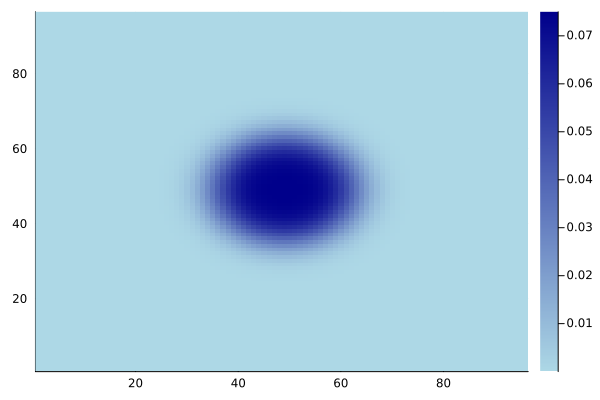

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)